# Descarga, análisis e interpretación de datos de violencia de género contra las mujeres y/o niñas

¡Bienvenidos al tutorial "Descarga, análisis e interpretación de datos de violencia de género contra las mujeres y/o niñas"!

En esta sesión, exploraremos datos relacionados con la violencia de género contra las mujeres y niñas, utilizando herramientas y técnicas de análisis de datos. Nuestro objetivo es comprender la incidencia delictiva en este ámbito y extraer insights significativos que puedan contribuir a la prevención y el abordaje de esta problemática.

## Contenido del Taller

* **Carga de datos y Exploración Inicial**: Comenzaremos cargando los datos de incidencia delictiva municipal. Realizaremos una exploración inicial de los datos para comprender su estructura y contenido.

* **Análisis descriptivo**: Utilizaremos técnicas de análisis descriptivo para examinar la distribución y tendencias de la violencia de género.

* **Visualización de datos**: Crearemos visualizaciones para representar la incidencia delictiva y destacar patrones relevantes.


¡Esperamos que esta sesión sea una experiencia enriquecedora y que los conocimientos adquiridos puedan contribuir al desarrollo de soluciones efectivas para combatir la violencia hacia las mujeres y niñas!


## 1. Carga de Datos y Exploración Inicial

Los datos explorar corresponden con los **Datos Abierto de Incidencia Delictiva**. Estos pueden consultarse en el siguiente [enlace](https://www.gob.mx/sesnsp/acciones-y-programas/datos-abiertos-de-incidencia-delictiva?state=published). En esta página encontraremos los archivos de datos abiertos referentes a incidencia delictiva y sus diccionarios de datos.

Realizaremos una exploración de los **Reportes de incidencia delictiva**. En específico, trabajaremos con los datos correspondientes con las **Cifras de Incidencia Delictiva Municipal, 2015 a abril 2024**. Sin embargo, debido al tamaño del archivo se provee un enlace para la descarga:

```
https://drive.google.com/file/d/1veMsoZYhdjmkaCdniHWpL8DnvRbsraru/view?usp=sharing
```
Realizaremos la descarga del archivo a través del enlace público propuesto mediante el módulo [`gdown`](https://pypi.org/project/gdown/). Una vez descargado, realizaremos la descomprensión mediante el módulo [`zipfile`](https://docs.python.org/3/library/zipfile.html).


In [98]:
import gdown
import zipfile
import os

In [99]:
# URL del archivo zip en Google Drive
url = 'https://drive.google.com/uc?id=1veMsoZYhdjmkaCdniHWpL8DnvRbsraru'

# Directorio de destino para descargar y descomprimir el archivo
output_dir = '/content/'

# Descargar el archivo zip
zip_path = os.path.join(output_dir, 'archivo.zip')
gdown.download(url, zip_path, quiet=False)

# Directorio donde se descomprimirán los archivos
extracted_dir = os.path.join(output_dir, 'descomprimido')

# Crear el directorio si no existe
os.makedirs(extracted_dir, exist_ok=True)

# Descomprimir el archivo zip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)

print("Archivo descargado y descomprimido correctamente.")

Downloading...
From (original): https://drive.google.com/uc?id=1veMsoZYhdjmkaCdniHWpL8DnvRbsraru
From (redirected): https://drive.google.com/uc?id=1veMsoZYhdjmkaCdniHWpL8DnvRbsraru&confirm=t&uuid=7dc047cd-29d3-4432-aa37-753051100822
To: /content/archivo.zip
100%|██████████| 115M/115M [00:00<00:00, 197MB/s]


Archivo descargado y descomprimido correctamente.


In [100]:
import pandas as pd

file_dir = '/content/descomprimido/Municipal-Delitos-2015-2024_abr2024/Municipal-Delitos-2015-2024_abr2024.csv'
df = pd.read_csv(file_dir, encoding='latin1')
print("DataFrame cargado correctamente.")

DataFrame cargado correctamente.


[Pandas](https://pandas.pydata.org) es una biblioteca de Python ampliamente utilizada para manipulación y análisis de datos. Proporciona estructuras de datos y funciones que facilitan la carga, manipulación, limpieza, transformación y análisis de datos de manera eficiente. Los principales objetos de Pandas son:

* DataFrame: Es una estructura de datos tabular bidimensional con etiquetas en filas y columnas, similar a una hoja de cálculo o una tabla de base de datos.

* Series: Es una estructura de datos unidimensional que puede contener cualquier tipo de datos. Son útiles para representar datos en una sola dimensión, como columnas individuales en un DataFrame.

* Index: Es una estructura de datos inmutable similar a un array que contiene etiquetas de índice para filas o columnas en un DataFrame o una Serie. Los índices son cruciales para la alineación de datos y la identificación de filas o columnas específicas en un DataFrame.

Realicemos la carga del archivo `Municipal-Delitos-2015-2024_abr2024/Municipal-Delitos-2015-2024_abr2024.csv` que contiene datos de las incidencias delictivas de 2015 a 2024.


In [101]:
import numpy as np
import pandas as pd
#pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt

In [102]:
file_dir = '/content/descomprimido/Municipal-Delitos-2015-2024_abr2024/Municipal-Delitos-2015-2024_abr2024.csv'

In [103]:
# Lectura del Archivo CSV
df = pd.read_csv(file_dir, encoding='latin1')

Este error sugiere que el archivo CSV contiene caracteres que no pueden ser decodificados correctamente con UTF-8, que es el estándar de codificación predeterminado utilizado por pandas al leer archivos.

In [104]:
df = pd.read_csv(file_dir, encoding='latin1')

In [105]:
# Primeras 5 observaciones
df.head()

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,2,...,1,1,0.0,1.0,1.0,0.0,2.0,1.0,0.0,1.0
1,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,1,...,0,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,0,...,1,1,3.0,2.0,0.0,1.0,2.0,0.0,0.0,0.0
3,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,1,...,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,0,...,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [106]:
# Filas y Columnas en el DataFrame
print("(Filas, Columnas): ")
print(df.shape)

(Filas, Columnas): 
(2319072, 21)


In [107]:
# Columnas e Índices
print("Columnas: ")
print(df.columns, '\n')
print("Índices: ")
print(df.index)

Columnas: 
Index(['Año', 'Clave_Ent', 'Entidad', 'Cve. Municipio', 'Municipio',
       'Bien jurídico afectado', 'Tipo de delito', 'Subtipo de delito',
       'Modalidad', 'Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
       'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'],
      dtype='object') 

Índices: 
RangeIndex(start=0, stop=2319072, step=1)


In [108]:
# Información delos Datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2319072 entries, 0 to 2319071
Data columns (total 21 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Año                     int64  
 1   Clave_Ent               int64  
 2   Entidad                 object 
 3   Cve. Municipio          int64  
 4   Municipio               object 
 5   Bien jurídico afectado  object 
 6   Tipo de delito          object 
 7   Subtipo de delito       object 
 8   Modalidad               object 
 9   Enero                   int64  
 10  Febrero                 int64  
 11  Marzo                   int64  
 12  Abril                   int64  
 13  Mayo                    float64
 14  Junio                   float64
 15  Julio                   float64
 16  Agosto                  float64
 17  Septiembre              float64
 18  Octubre                 float64
 19  Noviembre               float64
 20  Diciembre               float64
dtypes: float64(8), int64(7), object

In [109]:
# Tipos de Datos
print(df.dtypes)

Año                         int64
Clave_Ent                   int64
Entidad                    object
Cve. Municipio              int64
Municipio                  object
Bien jurídico afectado     object
Tipo de delito             object
Subtipo de delito          object
Modalidad                  object
Enero                       int64
Febrero                     int64
Marzo                       int64
Abril                       int64
Mayo                      float64
Junio                     float64
Julio                     float64
Agosto                    float64
Septiembre                float64
Octubre                   float64
Noviembre                 float64
Diciembre                 float64
dtype: object


In [110]:
# Descripción Estadística (Variables Numéricas)
df.describe()

,Año,Clave_Ent,Cve. Municipio,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
count,2.319072e+06,2.319072e+06,2.319072e+06,2.319072e+06,2.319072e+06,2.319072e+06,2.319072e+06,2.075738e+06,2.075738e+06,2.075738e+06,2.075738e+06,2.075738e+06,2.075738e+06,2.075738e+06,2.075738e+06
mean,2.019688e+03,1.920339e+01,1.930702e+04,6.686946e-01,6.678542e-01,7.418942e-01,6.949651e-01,7.289908e-01,7.268697e-01,7.112651e-01,7.317412e-01,7.165085e-01,7.479798e-01,6.984181e-01,6.699617e-01
std,2.802761e+00,7.523348e+00,7.539503e+03,8.007855e+00,7.894086e+00,8.723622e+00,8.234055e+00,8.620408e+00,8.549802e+00,8.451224e+00,8.709788e+00,8.364379e+00,8.679861e+00,8.167454e+00,8.072200e+00
min,2.015000e+03,1.000000e+00,1.001000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.017000e+03,1.400000e+01,1.405400e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.020000e+03,2.000000e+01,2.021600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.022000e+03,2.400000e+01,2.405700e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2.024000e+03,3.200000e+01,3.205800e+04,1.760000e+03,1.479000e+03,1.712000e+03,1.791000e+03,1.727000e+03,1.897000e+03,1.612000e+03,2.143000e+03,2.076000e+03,1.485000e+03,1.915000e+03,1.909000e+03


In [111]:
# Descripción Estadística (Variables Numéricas)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Año,2319072.0,2019.688430,2.802761,2015.0,2017.0,2020.0,2022.0,2024.0
Clave_Ent,2319072.0,19.203389,7.523348,1.0,14.0,20.0,24.0,32.0
Cve. Municipio,2319072.0,19307.015762,7539.502895,1001.0,14054.0,20216.0,24057.0,32058.0
Enero,2319072.0,0.668695,8.007855,0.0,0.0,0.0,0.0,1760.0
Febrero,2319072.0,0.667854,7.894086,0.0,0.0,0.0,0.0,1479.0
Marzo,2319072.0,0.741894,8.723622,0.0,0.0,0.0,0.0,1712.0
Abril,2319072.0,0.694965,8.234055,0.0,0.0,0.0,0.0,1791.0
Mayo,2075738.0,0.728991,8.620408,-1.0,0.0,0.0,0.0,1727.0
Junio,2075738.0,0.726870,8.549802,0.0,0.0,0.0,0.0,1897.0
Julio,2075738.0,0.711265,8.451224,0.0,0.0,0.0,0.0,1612.0


In [112]:
# Descripción Estadística (Variables Categóricas)
df.describe(include = 'object').T

,count,unique,top,freq
Entidad,2319072,32,Oaxaca,454720
Municipio,2319072,2334,Benito Juárez,6860
Bien jurídico afectado,2319072,7,El patrimonio,993888
Tipo de delito,2319072,40,Robo,851904
Subtipo de delito,2319072,55,Robo de vehículo automotor,141984
Modalidad,2319072,59,Sin violencia,283968


In [113]:
# Variables numéricas y categóricas
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(exclude=np.number).columns

In [114]:
# Eliminar columnas
df.drop(columns = ["Clave_Ent"])
#df.drop(columns = ["Clave_Ent"], inplace = True)

,Año,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,2015,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,2,0,1,1,0.0,1.0,1.0,0.0,2.0,1.0,0.0,1.0
1,2015,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,1,1,0,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2015,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,0,0,1,1,3.0,2.0,0.0,1.0,2.0,0.0,0.0,0.0
3,2015,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,1,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2319067,2024,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Falsificación,Falsificación,Falsificación,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2319068,2024,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Contra el medio ambiente,Contra el medio ambiente,Contra el medio ambiente,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2319069,2024,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Delitos cometidos por servidores públicos,Delitos cometidos por servidores públicos,Delitos cometidos por servidores públicos,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2319070,2024,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Electorales,Electorales,Electorales,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**¡Hey! Ahora te toca a ti**

Elimina las columnas `Clave_Ent` y `Cve. Municipio`. No olvides realizar los cambios sobre el dataframe original.

## 2. Funcionalidades Esenciales
### 2.1 Indexado y Filtrado de Datos
Los DataFrames pueden ser vistos como una arreglo bidimensional mejorado. El `array` subyacente puede ser explorado mediante el atributo `values`.

In [115]:
# Valores del DataFrame
df.values

array([[2015, 1, 'Aguascalientes', ..., 1.0, 0.0, 1.0],
       [2015, 1, 'Aguascalientes', ..., 0.0, 0.0, 0.0],
       [2015, 1, 'Aguascalientes', ..., 0.0, 0.0, 0.0],
       ...,
       [2024, 32, 'Zacatecas', ..., nan, nan, nan],
       [2024, 32, 'Zacatecas', ..., nan, nan, nan],
       [2024, 32, 'Zacatecas', ..., nan, nan, nan]], dtype=object)

Podemos seleccionar una o varias columnas a través del operador indexación.

In [116]:
df["Año"]

,Año
0,2015
1,2015
2,2015
3,2015
4,2015
...,...
2319067,2024
2319068,2024
2319069,2024
2319070,2024


In [117]:
cols = ['Año', 'Entidad', 'Municipio']
df[cols]

,Año,Entidad,Municipio
0,2015,Aguascalientes,Aguascalientes
1,2015,Aguascalientes,Aguascalientes
2,2015,Aguascalientes,Aguascalientes
3,2015,Aguascalientes,Aguascalientes
4,2015,Aguascalientes,Aguascalientes
...,...,...,...
2319067,2024,Zacatecas,Santa María de la Paz
2319068,2024,Zacatecas,Santa María de la Paz
2319069,2024,Zacatecas,Santa María de la Paz
2319070,2024,Zacatecas,Santa María de la Paz


Las funciones `loc` e `iloc` son dos funciones en Pandas que utilizan para seleccionar un conjunto de datos en un DataFrame de Pandas:
* iloc: Se utiliza para acceder a un grupo de filas y columnas por índices enteros.
* loc: Se utiliza para acceder a un grupo de filas y columnas por etiquetas o una matriz booleana.
Observa los siguientes ejemplos:


In [118]:
# Crear un DataFrame de ejemplo
ex = pd.DataFrame({'A': [1, 2, 3, 4, 5],
                   'B': [10, 20, 30, 40, 50]},
                   index=['a', 'b', 'c', 'd', 'e'])

# Imprimir DataFrame
print(ex, '\n')

# Utilizando loc para seleccionar por etiquetas
print(ex.loc['a':'c', 'A'], '\n')

# Utilizando iloc para seleccionar por índices enteros
print(ex.iloc[0:3, 1])

   A   B
a  1  10
b  2  20
c  3  30
d  4  40
e  5  50 

a    1
b    2
c    3
Name: A, dtype: int64 

a    10
b    20
c    30
Name: B, dtype: int64


Lo interesante es que con el indexador `loc` puedes el enmascaramiento y la indexación sofisticada. Observa como seleccionaremos las columnas año, municipio, tipo de delito y subtipo de delito para el estado de Yucatán para los años menores e iguales a 2020.

In [119]:
cols = ['Año', 'Entidad', 'Municipio', 'Tipo de Delito', 'Subtipo de Delito']
delitos_yucatan = df.loc[(df["Año"] <= 2020) & (df["Entidad"]== 'Yucatán'), ]
delitos_yucatan.head()

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
173166,2015,31,Yucatán,31001,Abalá,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
173167,2015,31,Yucatán,31001,Abalá,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
173168,2015,31,Yucatán,31001,Abalá,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
173169,2015,31,Yucatán,31001,Abalá,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
173170,2015,31,Yucatán,31001,Abalá,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Por otro lado, al seleccionar una columna categórica, es posible verificar cuales son sus valores únicos mediante los métodos `unique()` y `nunique()`. Por ejemplo, de esta manera verificamos que Yucatán tenga sus 106 municipios y la lista correspondiente.

In [120]:
delitos_yucatan["Municipio"].nunique()

106

In [121]:
delitos_yucatan["Municipio"].unique()

array(['Abalá', 'Acanceh', 'Akil', 'Baca', 'Bokobá', 'Buctzotz',
       'Cacalchén', 'Calotmul', 'Cansahcab', 'Cantamayec', 'Celestún',
       'Cenotillo', 'Conkal', 'Cuncunul', 'Cuzamá', 'Chacsinkín',
       'Chankom', 'Chapab', 'Chemax', 'Chicxulub Pueblo', 'Chichimilá',
       'Chikindzonot', 'Chocholá', 'Chumayel', 'Dzán', 'Dzemul',
       'Dzidzantún', 'Dzilam de Bravo', 'Dzilam González', 'Dzitás',
       'Dzoncauich', 'Espita', 'Halachó', 'Hocabá', 'Hoctún', 'Homún',
       'Huhí', 'Hunucmá', 'Ixil', 'Izamal', 'Kanasín', 'Kantunil', 'Kaua',
       'Kinchil', 'Kopomá', 'Mama', 'Maní', 'Maxcanú', 'Mayapán',
       'Mérida', 'Mocochá', 'Motul', 'Muna', 'Muxupip', 'Opichén',
       'Oxkutzcab', 'Panabá', 'Peto', 'Progreso', 'Quintana Roo',
       'Río Lagartos', 'Sacalum', 'Samahil', 'Sanahcat', 'San Felipe',
       'Santa Elena', 'Seyé', 'Sinanché', 'Sotuta', 'Sucilá', 'Sudzal',
       'Suma', 'Tahdziú', 'Tahmek', 'Teabo', 'Tecoh', 'Tekal de Venegas',
       'Tekantó', 'Tekax', 'Te

**¡Hey! Ahora te toca a ti**



1. Crea un nuevo dataframe denominado `delitos_yucatan` que contenga los registros para la entidad de Yucatán y con años cuyo registros de meses se tengan completos.
2. Explora la columna 'Tipo de Delito'. Observa los tipos de delito de interés. Más adelante realizaremos un filtrado sobre estos.

In [122]:
# Escribe tu código aquí

### 2.2 Ordenamiento

El ordenamiento del conjunto de datos de acuerdo con algún criterio es otra operación de gran relevancia. Este ordenamiento puede darse considerando uno o varias columnas.

In [123]:
# Ordenamiento respecto de los municipios
delitos_yucatan.sort_values('Municipio')

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
173166,2015,31,Yucatán,31001,Abalá,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1330585,2020,31,Yucatán,31001,Abalá,El patrimonio,Robo,Robo a casa habitación,Con violencia,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1330584,2020,31,Yucatán,31001,Abalá,La libertad y la seguridad sexual,Otros delitos que atentan contra la libertad y...,Otros delitos que atentan contra la libertad y...,Otros delitos que atentan contra la libertad y...,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1330583,2020,31,Yucatán,31001,Abalá,La libertad y la seguridad sexual,Incesto,Incesto,Incesto,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1330582,2020,31,Yucatán,31001,Abalá,La libertad y la seguridad sexual,Violación equiparada,Violación equiparada,Violación equiparada,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856557,2018,31,Yucatán,31106,Yobaín,La libertad y la seguridad sexual,Incesto,Incesto,Incesto,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
856558,2018,31,Yucatán,31106,Yobaín,La libertad y la seguridad sexual,Otros delitos que atentan contra la libertad y...,Otros delitos que atentan contra la libertad y...,Otros delitos que atentan contra la libertad y...,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
856559,2018,31,Yucatán,31106,Yobaín,El patrimonio,Robo,Robo a casa habitación,Con violencia,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
856561,2018,31,Yucatán,31106,Yobaín,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [124]:
# Ordenamiento respecto de los municipios (descendente)
delitos_yucatan.sort_values('Municipio', ascending = False)

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
1340933,2020,31,Yucatán,31106,Yobaín,Otros bienes jurídicos afectados (del fuero co...,Otros delitos del Fuero Común,Otros delitos del Fuero Común,Otros delitos del Fuero Común,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
856548,2018,31,Yucatán,31106,Yobaín,Libertad personal,Secuestro,Secuestro,Otro tipo de secuestros,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
856556,2018,31,Yucatán,31106,Yobaín,La libertad y la seguridad sexual,Violación equiparada,Violación equiparada,Violación equiparada,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
856555,2018,31,Yucatán,31106,Yobaín,La libertad y la seguridad sexual,Violación simple,Violación simple,Violación simple,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
856554,2018,31,Yucatán,31106,Yobaín,La libertad y la seguridad sexual,Hostigamiento sexual,Hostigamiento sexual,Hostigamiento sexual,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846327,2018,31,Yucatán,31001,Abalá,Otros bienes jurídicos afectados (del fuero co...,Otros delitos del Fuero Común,Otros delitos del Fuero Común,Otros delitos del Fuero Común,0,...,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
846326,2018,31,Yucatán,31001,Abalá,Otros bienes jurídicos afectados (del fuero co...,Electorales,Electorales,Electorales,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
846325,2018,31,Yucatán,31001,Abalá,Otros bienes jurídicos afectados (del fuero co...,Delitos cometidos por servidores públicos,Delitos cometidos por servidores públicos,Delitos cometidos por servidores públicos,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
846324,2018,31,Yucatán,31001,Abalá,Otros bienes jurídicos afectados (del fuero co...,Contra el medio ambiente,Contra el medio ambiente,Contra el medio ambiente,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [125]:
# Ordenamiento respecto de los municipios y Tipo de Delito
delitos_yucatan.sort_values(['Municipio', 'Tipo de delito'])

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
173188,2015,31,Yucatán,31001,Abalá,La vida y la Integridad corporal,Aborto,Aborto,Aborto,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
362426,2016,31,Yucatán,31001,Abalá,La vida y la Integridad corporal,Aborto,Aborto,Aborto,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
604094,2017,31,Yucatán,31001,Abalá,La vida y la Integridad corporal,Aborto,Aborto,Aborto,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
846252,2018,31,Yucatán,31001,Abalá,La vida y la Integridad corporal,Aborto,Aborto,Aborto,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1088410,2019,31,Yucatán,31001,Abalá,La vida y la Integridad corporal,Aborto,Aborto,Aborto,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372775,2016,31,Yucatán,31106,Yobaín,La familia,Violencia familiar,Violencia familiar,Violencia familiar,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
614443,2017,31,Yucatán,31106,Yobaín,La familia,Violencia familiar,Violencia familiar,Violencia familiar,0,...,0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
856601,2018,31,Yucatán,31106,Yobaín,La familia,Violencia familiar,Violencia familiar,Violencia familiar,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1098759,2019,31,Yucatán,31106,Yobaín,La familia,Violencia familiar,Violencia familiar,Violencia familiar,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 3. Manipulación de Datos

### 3.1 `pivot_table` y `melt`

Existen dos operaciones de interés para la manipulación de datos: `pivot_table` y `melt`.

La función pivot_table en Pandas se utiliza para crear una tabla dinámica a partir de un DataFrame. Permite reorganizar y resumir datos al agregarlos y agruparlos según ciertas columnas. Se pueden especificar los valores a utilizar, las columnas para agrupar, las filas para agrupar y cómo agregar los valores (por ejemplo, sumar, promediar, contar, etc.). Supongamos que tenemos un DataFrame que contiene datos de ventas de productos en diferentes regiones y queremos calcular el promedio de ventas por producto y región:


In [126]:
# Crear DataFrame de ejemplo
data = {'Producto': ['A', 'A', 'B', 'B', 'A', 'B'],
        'Region': ['Norte', 'Sur', 'Norte', 'Sur', 'Norte', 'Sur'],
        'Ventas': [100, 150, 200, 250, 120, 180]}
ex = pd.DataFrame(data)

# Imprimir DataFrame
print(ex,'\n')

# Calcular el promedio de ventas por producto y región
pivot = ex.pivot_table(values='Ventas', index='Producto', columns='Region', aggfunc='mean')
print(pivot)

  Producto Region  Ventas
0        A  Norte     100
1        A    Sur     150
2        B  Norte     200
3        B    Sur     250
4        A  Norte     120
5        B    Sur     180 

Region    Norte    Sur
Producto              
A         110.0  150.0
B         200.0  215.0


La función melt en Pandas se utiliza para "derretir" o transformar un DataFrame de formato ancho a formato largo. Básicamente, toma un DataFrame donde algunas columnas son identificadores y otras son valores, y lo convierte en un DataFrame donde una o más columnas son identificadores y el resto son valores. Es útil cuando se desea realizar análisis de datos y visualizaciones que requieren datos en formato largo. Supongamos que tenemos un DataFrame que contiene información sobre la temperatura diaria en diferentes ciudades, donde las columnas representan las fechas y los valores representan las temperaturas. Queremos "derretir" el DataFrame para que las fechas se conviertan en una sola columna y las temperaturas en otra:

In [127]:
# Crear DataFrame de ejemplo
data = {'Ciudad': ['NYC', 'LA', 'Chicago'],
        '1/1/2022': [32, 70, 20],
        '1/2/2022': [35, 72, 22],
        '1/3/2022': [30, 68, 25]}
ex = pd.DataFrame(data)

# Imprimir DataFrame
print(ex,'\n')

# Derretir el DataFrame para convertir las fechas en una sola columna y las temperaturas en otra
melted = pd.melt(ex, id_vars=['Ciudad'], var_name='Fecha', value_name='Temperatura')
print(melted)


    Ciudad  1/1/2022  1/2/2022  1/3/2022
0      NYC        32        35        30
1       LA        70        72        68
2  Chicago        20        22        25 

    Ciudad     Fecha  Temperatura
0      NYC  1/1/2022           32
1       LA  1/1/2022           70
2  Chicago  1/1/2022           20
3      NYC  1/2/2022           35
4       LA  1/2/2022           72
5  Chicago  1/2/2022           22
6      NYC  1/3/2022           30
7       LA  1/3/2022           68
8  Chicago  1/3/2022           25


**¡Hey! Ahora te toca a ti**

Observa el DataFrame `delitos_yucatan`. Realiza la operación apropiada para que en lugar de tener una columna con el mes denominada `Mes` y otra con el número de incidencias denominada `Incidencias`.

In [128]:
# Observa el DataFrame delitos_yucatan. Realiza la operación apropiada para que en lugar de tener una columna con el mes denominada Mes y otra con el número de incidencias denominada Incidencias.
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
delitos_yucatan_melted = pd.melt(delitos_yucatan,
                                 id_vars=['Año', 'Clave_Ent', 'Entidad', 'Cve. Municipio', 'Municipio',
                                          'Bien jurídico afectado', 'Tipo de delito', 'Subtipo de delito', 'Modalidad'],
                                 value_vars=meses,
                                 var_name='Mes',
                                 value_name='Incidencias')
display(delitos_yucatan_melted.head())

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Mes,Incidencias
0,2015,31,Yucatán,31001,Abalá,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,Enero,0.0
1,2015,31,Yucatán,31001,Abalá,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,Enero,0.0
2,2015,31,Yucatán,31001,Abalá,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,Enero,0.0
3,2015,31,Yucatán,31001,Abalá,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,Enero,0.0
4,2015,31,Yucatán,31001,Abalá,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,Enero,0.0


### 3.2 `groupby`

La operación groupby en Pandas se utiliza para agrupar filas de un DataFrame según los valores de una o más columnas. Después de agrupar los datos, se pueden realizar operaciones de agregación, como sumar, promediar, contar, entre otras, en cada grupo.

1) Calcular el número total de incidencias de delitos por tipo de delito

In [129]:
# Agrupar por 'Tipo de delito' y sumar las incidencias
total_incidencias_por_tipo = delitos_yucatan_melted.groupby('Tipo de delito')['Incidencias'].sum().sort_values(ascending = False)
print(total_incidencias_por_tipo)

Tipo de delito
Amenazas                                                                         23675.0
Otros delitos del Fuero Común                                                    19508.0
Daño a la propiedad                                                              14461.0
Robo                                                                             14086.0
Violencia familiar                                                               11054.0
Lesiones                                                                         10681.0
Fraude                                                                            5955.0
Otros delitos contra el patrimonio                                                5428.0
Abuso de confianza                                                                4677.0
Incumplimiento de obligaciones de asistencia familiar                             4302.0
Allanamiento de morada                                                            4140.0
Otros 

*2*) ¿Cuál es el tipo de delito más común en cada municipio?

In [130]:
# Agrupar por 'Municipio' y 'Tipo de delito', y sumar las incidencias
tipo_delito_comun_por_municipio = delitos_yucatan_melted.groupby(['Municipio', 'Tipo de delito'])['Incidencias'].sum().reset_index()
print(tipo_delito_comun_por_municipio)

     Municipio                                     Tipo de delito  Incidencias
0        Abalá                                             Aborto          0.0
1        Abalá                                 Abuso de confianza          2.0
2        Abalá                                       Abuso sexual          0.0
3        Abalá                                       Acoso sexual          0.0
4        Abalá                             Allanamiento de morada          0.0
...        ...                                                ...          ...
4235    Yobaín                                 Tráfico de menores          0.0
4236    Yobaín                               Violación equiparada          0.0
4237    Yobaín                                   Violación simple          0.0
4238    Yobaín  Violencia de género en todas sus modalidades d...          0.0
4239    Yobaín                                 Violencia familiar          2.0

[4240 rows x 3 columns]


In [131]:
# Encontrar el índice del tipo de delito con el mayor número de incidencias por municipio
indice_maximo = tipo_delito_comun_por_municipio.groupby('Municipio')['Incidencias'].idxmax()

In [132]:
# Filtrar el DataFrame original usando los índices del máximo
tipo_delito_comun_por_municipio_maximo = tipo_delito_comun_por_municipio.loc[indice_maximo]
print(tipo_delito_comun_por_municipio_maximo)

       Municipio                 Tipo de delito  Incidencias
27         Abalá  Otros delitos del Fuero Común         15.0
45       Acanceh                       Amenazas         47.0
85          Akil                       Amenazas        104.0
147         Baca  Otros delitos del Fuero Común         95.0
187       Bokobá  Otros delitos del Fuero Común        112.0
...          ...                            ...          ...
4045  Valladolid                       Amenazas        471.0
4085     Xocchel                       Amenazas          5.0
4125     Yaxcabá                       Amenazas          5.0
4165    Yaxkukul                       Amenazas         12.0
4205      Yobaín                       Amenazas         15.0

[106 rows x 3 columns]


**¡Hey! Ahora te toca a ti**

Ahora únicamente nos vamos a centrar en los Feminicidios.

1. Crea un dataframe denominado `feminicidios_yucatan` que contenga los "Tipo de delito" que corresponda con "Feminicidio".
2. Calcula el total de feminicidios en Yucatán a lo largo de los años.
3. Identifica cual es el top 10 municipios con más feminicidios en Yucatán en 2023.

In [133]:
# Identifica cual es el top 10 municipios con más feminicidios en Yucatán en 2023.
feminicidios_2023 = feminicidios_yucatan[feminicidios_yucatan['Año'] == 2023]
top_municipios_feminicidios = feminicidios_2023.groupby('Municipio')['Incidencias'].sum().sort_values(ascending=False).head(10)
print("Top 10 municipios con más feminicidios en Yucatán en 2023:")
print(top_municipios_feminicidios)

Top 10 municipios con más feminicidios en Yucatán en 2023:
Series([], Name: Incidencias, dtype: float64)


## 4. Visualización de Datos con Seaborn
### 4.1 Gráfico de Líneas

In [134]:
# Total de Feminicidios en Yucatán por Año
total_feminicidios

,Incidencias
Año,
2015,1.0
2016,1.0
2017,9.0
2018,7.0
2019,3.0
2020,6.0


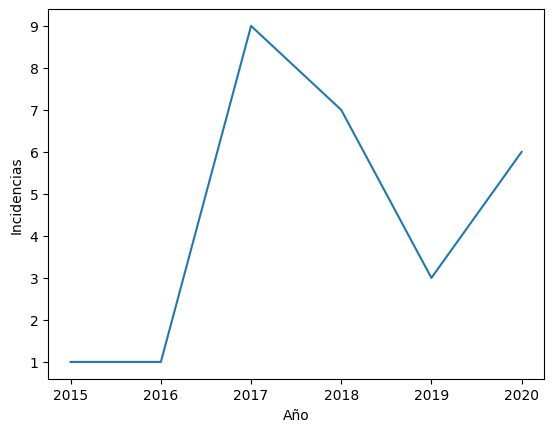

In [135]:
sns.lineplot(total_feminicidios, legend = True)
plt.show()

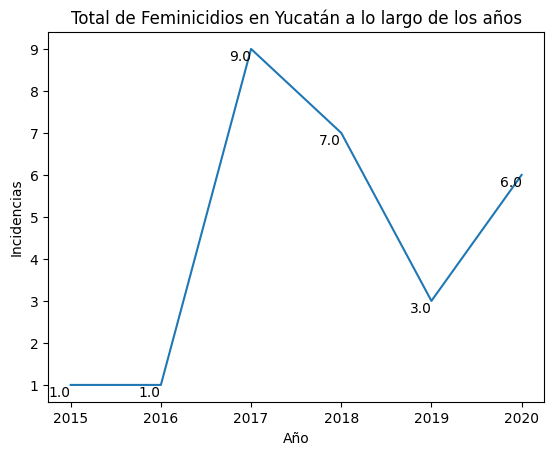

In [136]:
sns.lineplot(total_feminicidios, legend = True)

for i, incidencias in enumerate(total_feminicidios):
    plt.text(total_feminicidios.index[i], incidencias, str(incidencias), ha='right', va='top')

plt.xlabel('Año')
plt.ylabel('Incidencias')
plt.title('Total de Feminicidios en Yucatán a lo largo de los años')
plt.show()

### 4.2 Gráfico de Barras

In [137]:
top_municipios_feminicidios.head()

,Incidencias
Municipio,


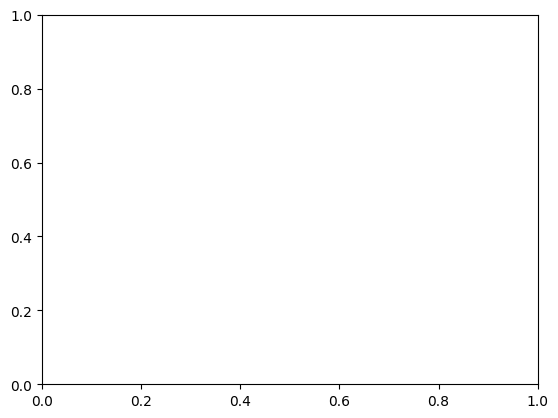

In [138]:
sns.barplot(top_municipios_feminicidios)
plt.show()

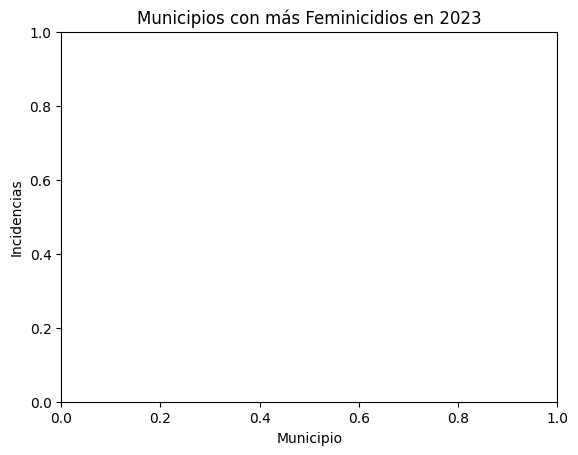

In [139]:
sns.barplot(x=top_municipios_feminicidios.index, y=top_municipios_feminicidios.values, palette=['grey' if m != 'Mérida' else 'red' for m in top_municipios_feminicidios.index])
plt.xlabel('Municipio')
plt.ylabel('Incidencias')
plt.title('Municipios con más Feminicidios en 2023')
plt.show()
plt.show()

### 4.3 Gráfica de Barras Apiladas



In [140]:
feminicidios_yucatan.head()

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Mes,Incidencias
18,2015,31,Yucatán,31001,Abalá,La vida y la Integridad corporal,Feminicidio,Feminicidio,Con arma de fuego,Enero,0.0
19,2015,31,Yucatán,31001,Abalá,La vida y la Integridad corporal,Feminicidio,Feminicidio,Con arma blanca,Enero,0.0
20,2015,31,Yucatán,31001,Abalá,La vida y la Integridad corporal,Feminicidio,Feminicidio,Con otro elemento,Enero,0.0
21,2015,31,Yucatán,31001,Abalá,La vida y la Integridad corporal,Feminicidio,Feminicidio,No especificado,Enero,0.0
116,2015,31,Yucatán,31002,Acanceh,La vida y la Integridad corporal,Feminicidio,Feminicidio,Con arma de fuego,Enero,0.0


In [141]:
total_feminicidios_modalidad = feminicidios_yucatan.groupby(['Año', 'Modalidad'])['Incidencias'].sum().reset_index()
total_feminicidios_modalidad

,Año,Modalidad,Incidencias
0,2015,Con arma blanca,0.0
1,2015,Con arma de fuego,0.0
2,2015,Con otro elemento,1.0
3,2015,No especificado,0.0
4,2016,Con arma blanca,1.0
5,2016,Con arma de fuego,0.0
6,2016,Con otro elemento,0.0
7,2016,No especificado,0.0
8,2017,Con arma blanca,6.0
9,2017,Con arma de fuego,1.0


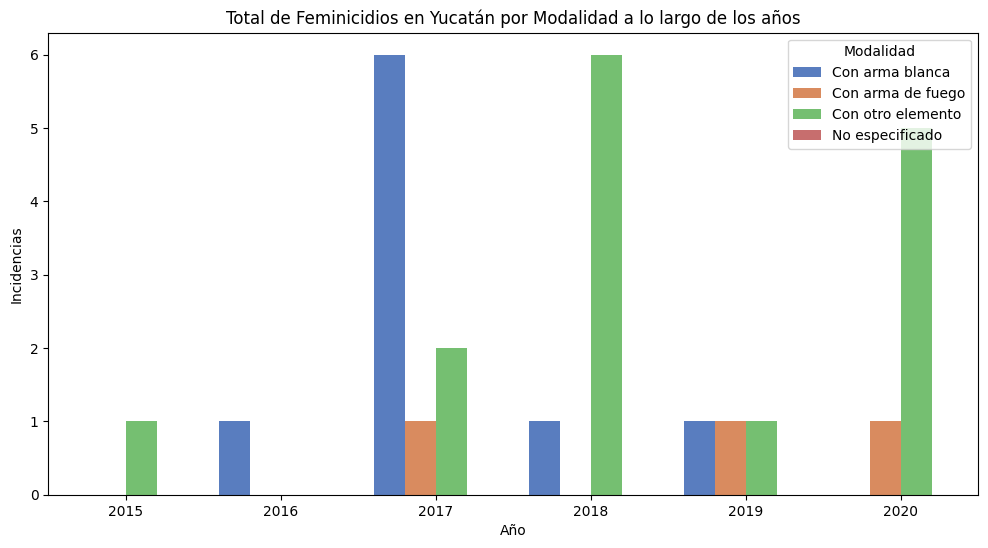

In [142]:
# Crear el stack bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Año', y='Incidencias', hue='Modalidad', data=total_feminicidios_modalidad, palette='muted')

# Agregar etiquetas y título
plt.xlabel('Año')
plt.ylabel('Incidencias')
plt.title('Total de Feminicidios en Yucatán por Modalidad a lo largo de los años')
plt.legend(title='Modalidad', loc='upper right')

# Mostrar el stack bar chart
plt.show()

### 4.3 Mapa de Calor

In [143]:
feminicidios_time = feminicidios_yucatan.groupby(['Año','Mes'])['Incidencias'].sum().reset_index()
feminicidios_time

,Año,Mes,Incidencias
0,2015,Abril,0.0
1,2015,Agosto,0.0
2,2015,Diciembre,1.0
3,2015,Enero,0.0
4,2015,Febrero,0.0
...,...,...,...
67,2020,Marzo,1.0
68,2020,Mayo,1.0
69,2020,Noviembre,0.0
70,2020,Octubre,0.0


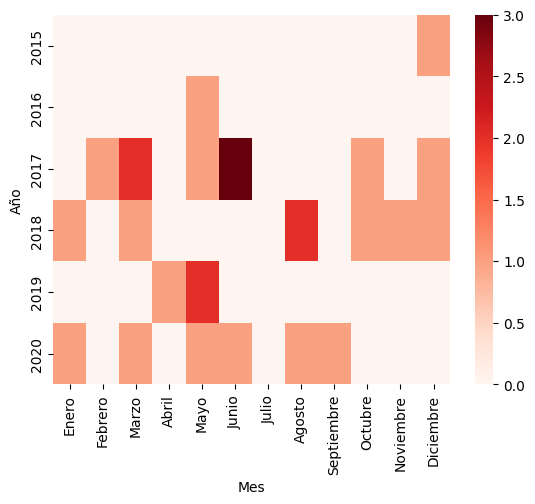

In [144]:
meses_ordenados = {
    "Enero": 1,
    "Febrero": 2,
    "Marzo": 3,
    "Abril": 4,
    "Mayo": 5,
    "Junio": 6,
    "Julio": 7,
    "Agosto": 8,
    "Septiembre": 9,
    "Octubre": 10,
    "Noviembre": 11,
    "Diciembre": 12
}

sns.heatmap(feminicidios_time.pivot_table(values='Incidencias', index='Año', columns='Mes').reindex(columns=meses_ordenados.keys()), cmap='Reds')
plt.show()
